# Capstone Project Survey Responses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Import survey response data
survey = pd.read_csv("/Users/hayleeoyler/Downloads/survey_responses.csv")

In [56]:
# Rename column names
survey = survey.rename(columns={
    'My first choice project is (enter proposal number):': 'first_choice',
    'My second choice project is (enter proposal number):': 'second_choice',
    'My third choice project is (enter proposal number):': 'third_choice',
    'My fourth choice project is (enter proposal number):': 'fourth_choice',
})

In [ ]:
# Create a list of choices to iterate over
column_names = survey.columns[2:6].to_list()

['first_choice', 'second_choice', 'third_choice', 'fourth_choice']

In [ ]:

# Change the type of the choice responses to string and take a count of responses
for column in column_names:
    survey[column] = survey[column].astype('Int64')

In [43]:
survey.assign(column_count=pd.Series(survey.groupby('first_choice').size().values))
survey.groupby('first_choice').size().values

array([1, 1, 2, 2, 3, 3, 1, 1])

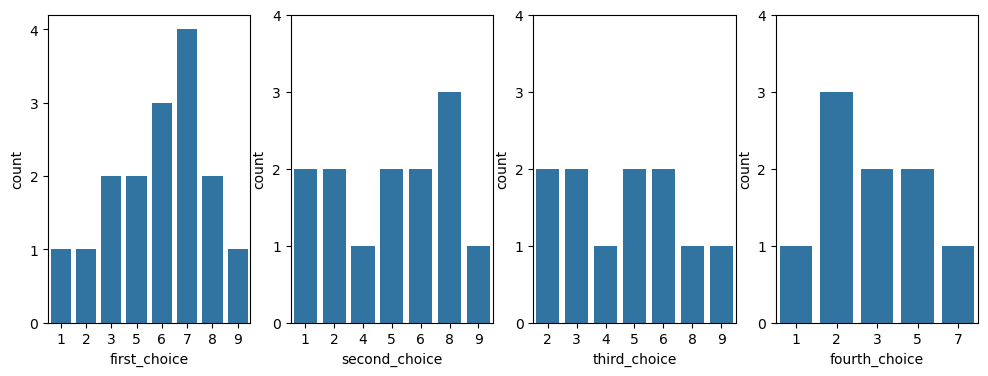

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

# ax = sns.countplot(survey, x='first_choice')

for ax, i in zip(axes, column_names):
    # ax.set_title(i)
    sns.countplot(x=survey[i].dropna(), ax=ax, orient = 'h')
    # survey[i].plot(ax=ax,
    #                kind='bar')
    # ax.set_xlim([0,9])
    # ax.set_xticks(range(0,10))
    ax.set_yticks(range(0,5))
    
# fig.suptitle('Top 3 energy sources for electric power plants in CA', fontsize=14)
plt.show()                     


In [68]:
survey.head()

,Timestamp,Name,first_choice,second_choice,third_choice,fourth_choice
0,11/5/2024 18:32:48,Haylee,5,2,<NA>,<NA>
1,11/5/2024 18:38:08,Joshua Mull,3,6,8,5
2,11/5/2024 18:40:04,Brooke,6,9,2,7
3,11/5/2024 18:40:24,Eva,6,1,5,<NA>
4,11/5/2024 18:41:14,Liz,2,5,4,1
